## Second Attempt: DataCamp template

## 1. Problem Framing

The issue at hand........

## 2. Importing Libraries

In [1]:
from IPython.display import display
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO 
from subprocess import call

import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

from sklearn import tree
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

C:\Users\User1\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## 3.Exploratory Data Analysis

In [2]:
df = pd.read_csv('wisconsin.csv')
df.head(2)
df.drop(df.columns[0], axis=1, inplace=True)
# using pickle to save df for functions
df.to_pickle('./dataframe.pkl')
del df['YEAR']
len(df)

51376

In [3]:
df.head(1)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WEATHER_DELAY,airline_full_name,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,7,1,3,OO,3423,N170SY,MKE,SEA,1605,1603.0,...,NaN,Skywest Airlines Inc.,Milwaukee,WI,42.94722,-87.89658,Seattle,WA,47.44898,-122.30931


In [4]:
df.isna().sum()

MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                 56
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME            1225
DEPARTURE_DELAY           1225
TAXI_OUT                  1254
WHEELS_OFF                1254
SCHEDULED_TIME               0
ELAPSED_TIME              1382
AIR_TIME                  1382
DISTANCE                     0
WHEELS_ON                 1282
TAXI_IN                   1282
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              1282
ARRIVAL_DELAY             1382
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON      50114
AIR_SYSTEM_DELAY         42812
SECURITY_DELAY           42812
AIRLINE_DELAY            42812
LATE_AIRCRAFT_DELAY      42812
WEATHER_DELAY            42812
airline_full_name            0
ORIGIN_CITY                  0
ORIGIN_S

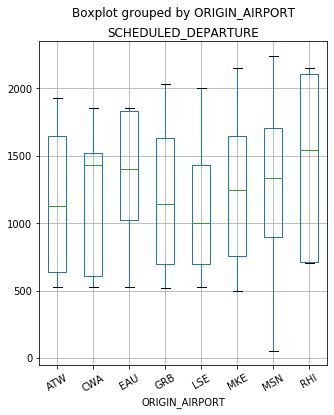

In [5]:
df.boxplot('SCHEDULED_DEPARTURE','ORIGIN_AIRPORT',rot = 30,figsize=(5,6))

In [6]:
origin_airports = df['ORIGIN_AIRPORT'].unique()
origin_airports

array(['MKE', 'ATW', 'MSN', 'GRB', 'EAU', 'CWA', 'LSE', 'RHI'],
      dtype=object)

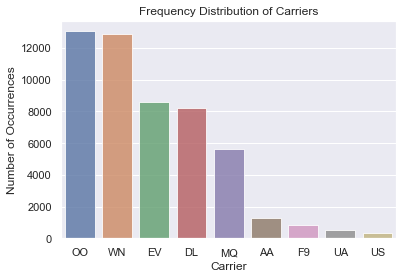

In [7]:
carrier_count = df['AIRLINE'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.8)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

In [8]:
destination_airports = df['DESTINATION_AIRPORT'].unique()
destination_airports

array(['SEA', 'PHX', 'ORD', 'LAS', 'LAX', 'DFW', 'MSP', 'ATL', 'SLC',
       'SFO', 'DEN', 'IAH', 'EWR', 'SAN', 'MCO', 'DCA', 'BWI', 'TPA',
       'FLL', 'DTW', 'BOS', 'MCI', 'MSY', 'STL', 'CVG', 'CLE', 'DAL',
       'LGA', 'RSW', 'CID', 'ATW', 'IMT', 'CWA', 'TTN'], dtype=object)

### Class Imbalance Exploration

In [9]:
%load_ext autoreload
%autoreload
from clockwork_orange import delay_cutoff_plot

### Class Imbalance at various levels of delay

Wall time: 0 ns


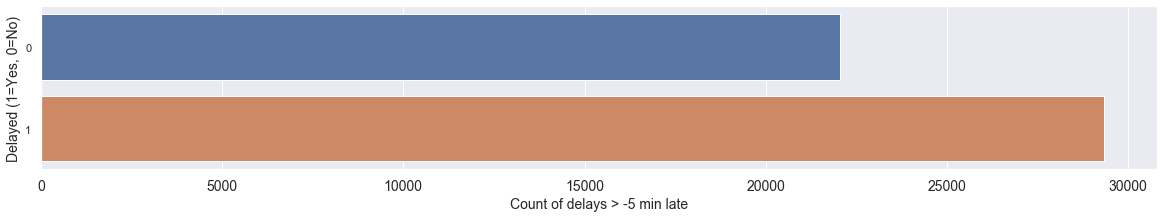

##########################################
Total flights   :  51376
Flights delayed :  29322
Flights ontime  :  22054
##########################################
Flights delayed :  57.073 %
Flights ontime  :  42.927 %
##########################################


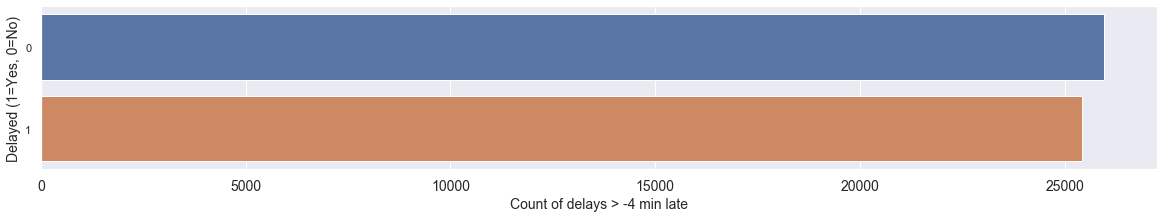

##########################################
Total flights   :  51376
Flights delayed :  25426
Flights ontime  :  25950
##########################################
Flights delayed :  49.49 %
Flights ontime  :  50.51 %
##########################################


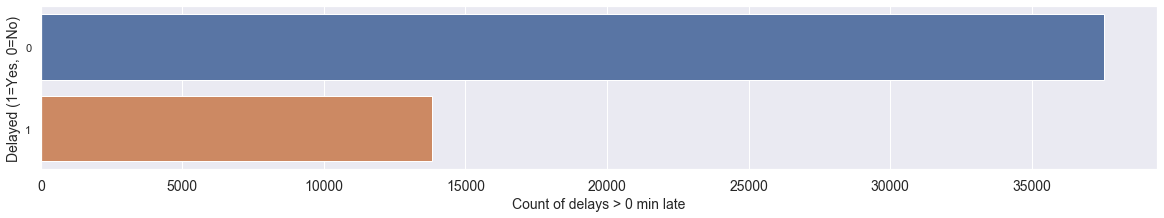

##########################################
Total flights   :  51376
Flights delayed :  13831
Flights ontime  :  37545
##########################################
Flights delayed :  26.921 %
Flights ontime  :  73.079 %
##########################################


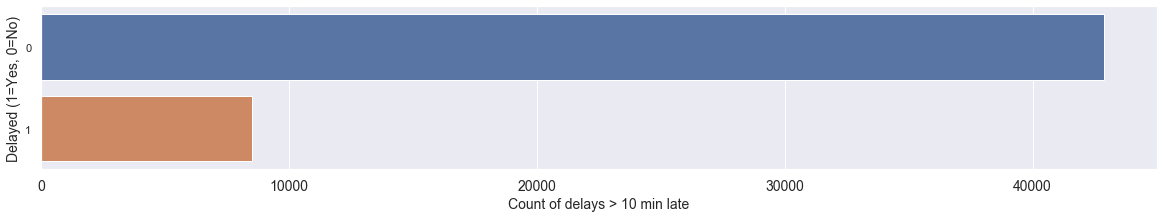

##########################################
Total flights   :  51376
Flights delayed :  8509
Flights ontime  :  42867
##########################################
Flights delayed :  16.562 %
Flights ontime  :  83.438 %
##########################################


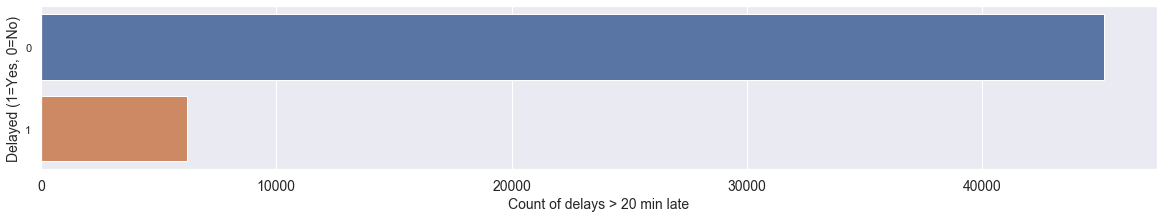

##########################################
Total flights   :  51376
Flights delayed :  6223
Flights ontime  :  45153
##########################################
Flights delayed :  12.113 %
Flights ontime  :  87.887 %
##########################################


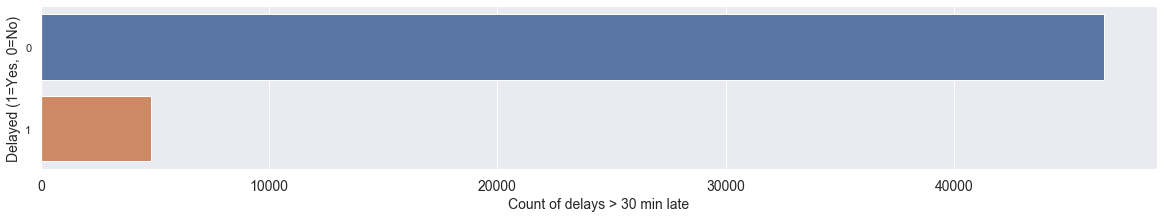

##########################################
Total flights   :  51376
Flights delayed :  4815
Flights ontime  :  46561
##########################################
Flights delayed :  9.372 %
Flights ontime  :  90.628 %
##########################################


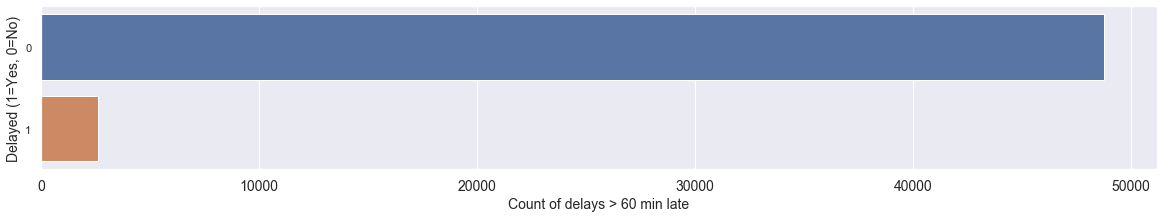

##########################################
Total flights   :  51376
Flights delayed :  2617
Flights ontime  :  48759
##########################################
Flights delayed :  5.094 %
Flights ontime  :  94.906 %
##########################################


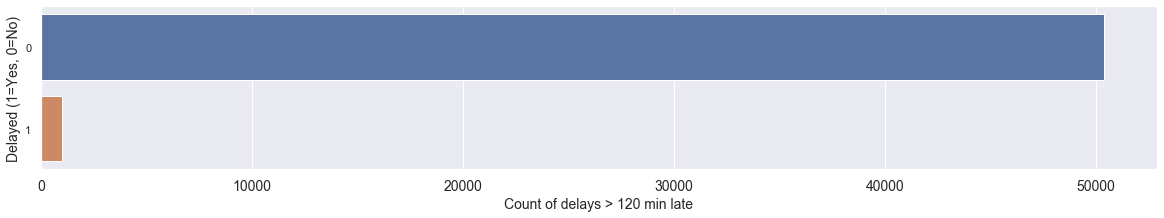

##########################################
Total flights   :  51376
Flights delayed :  1025
Flights ontime  :  50351
##########################################
Flights delayed :  1.995 %
Flights ontime  :  98.005 %
##########################################


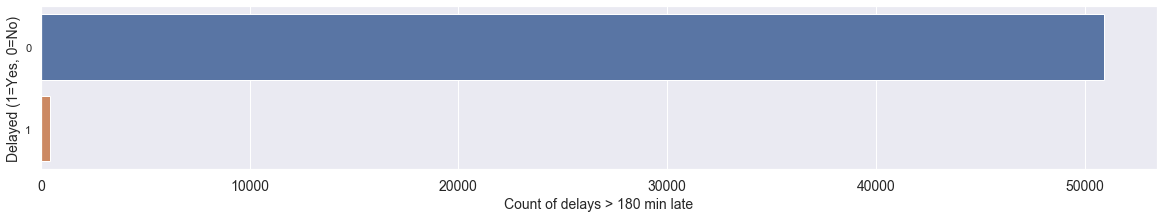

##########################################
Total flights   :  51376
Flights delayed :  461
Flights ontime  :  50915
##########################################
Flights delayed :  0.897 %
Flights ontime  :  99.103 %
##########################################


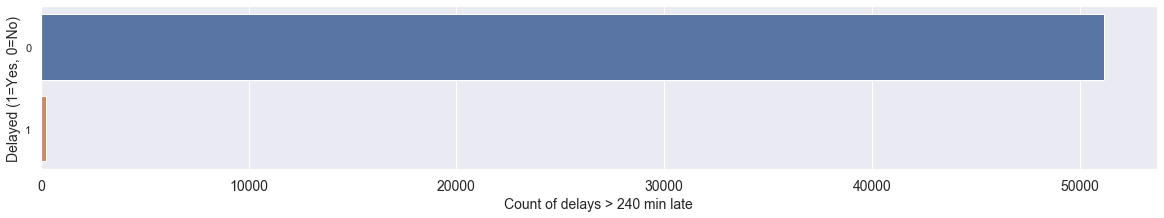

##########################################
Total flights   :  51376
Flights delayed :  228
Flights ontime  :  51148
##########################################
Flights delayed :  0.444 %
Flights ontime  :  99.556 %
##########################################


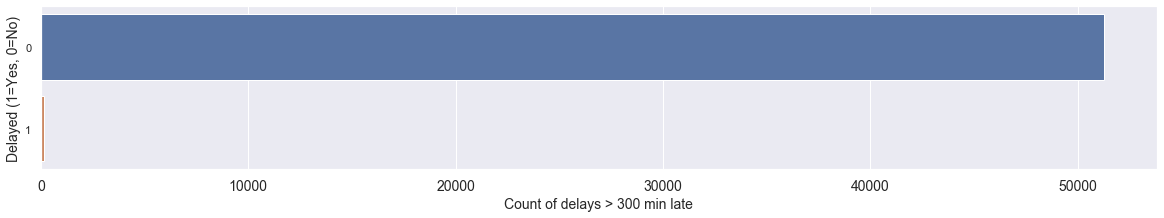

##########################################
Total flights   :  51376
Flights delayed :  131
Flights ontime  :  51245
##########################################
Flights delayed :  0.255 %
Flights ontime  :  99.745 %
##########################################


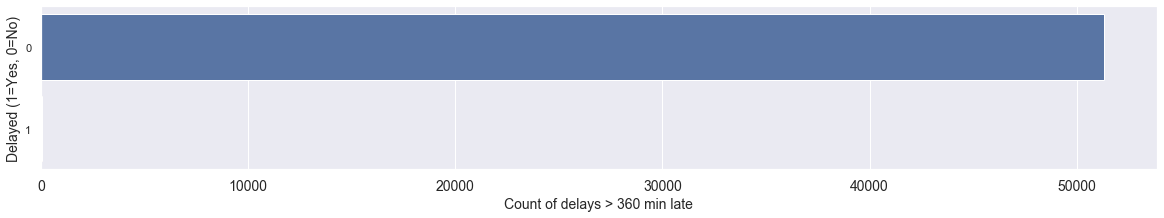

##########################################
Total flights   :  51376
Flights delayed :  78
Flights ontime  :  51298
##########################################
Flights delayed :  0.152 %
Flights ontime  :  99.848 %
##########################################


In [10]:
%time
# balanced class for delays at -4 minutes, ie take off 4 minutes early
cutoffs = (-5, -4, 0, 10, 20, 30, 60, 120, 180, 240, 300, 360)

for i in cutoffs:
    delay_cutoff_plot(i)

In [11]:
%load_ext autoreload
%autoreload
from clockwork_orange import classifier_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


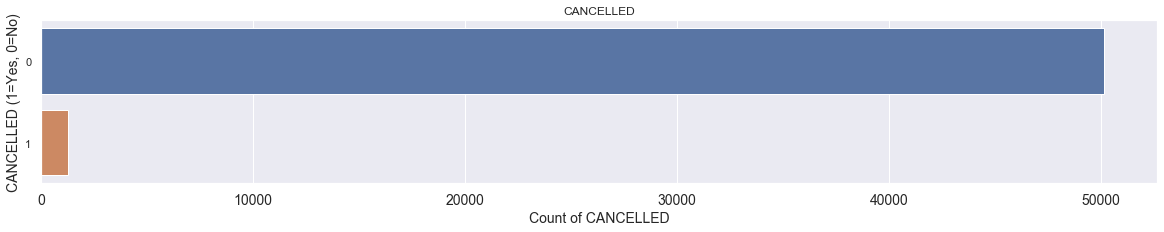

##########################################
Total flights         :  51376
Flights CANCELLED      :   1262
Flights not CANCELLED  :  50114
##########################################
% Flights CANCELLED    :  2.456 %
% Flights not CANCELLED: 97.544 %
##########################################


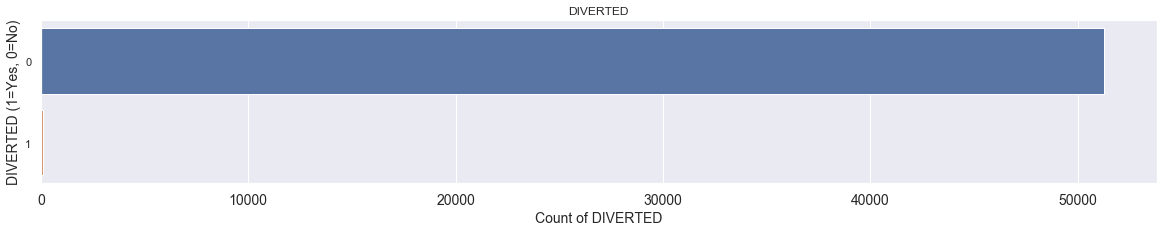

##########################################
Total flights         :  51376
Flights DIVERTED      :   120
Flights not DIVERTED  :  51256
##########################################
% Flights DIVERTED    :  0.234 %
% Flights not DIVERTED: 99.766 %
##########################################


In [12]:
%autoreload
cols = ('CANCELLED', 'DIVERTED')

for c in cols:
    classifier_plot(c)

In [13]:
## Define & Create Target Variable lateness
late = 10
df['DELAYED_TARGET'] = np.where(df['DEPARTURE_DELAY'] > late, 1, 0)

The chosen class lateness cutoff for flights is 10 minutes. The class imbalance is given below:

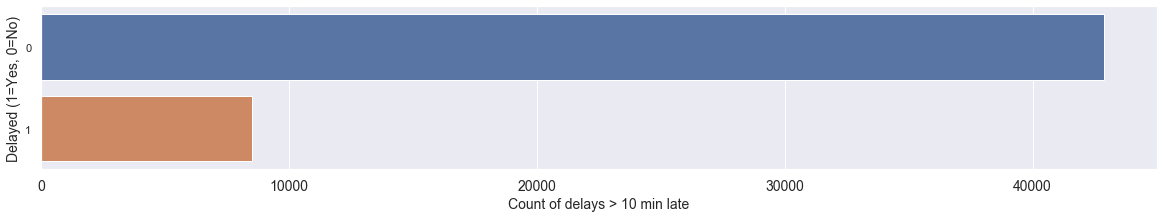

##########################################
Total flights   :  51376
Flights delayed :  8509
Flights ontime  :  42867
##########################################
Flights delayed :  16.562 %
Flights ontime  :  83.438 %
##########################################


In [14]:
delay_cutoff_plot(late)

In [15]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'airline_full_name',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'DESTINATION_LATITUDE',
       'DESTINATION_LONGITUDE', 'DELAYED_TARGET'],
      dtype='object')

In [16]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'airline_full_name',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'DESTINATION_LATITUDE',
       'DESTINATION_LONGITUDE', 'DELAYED_TARGET'],
      dtype='object')

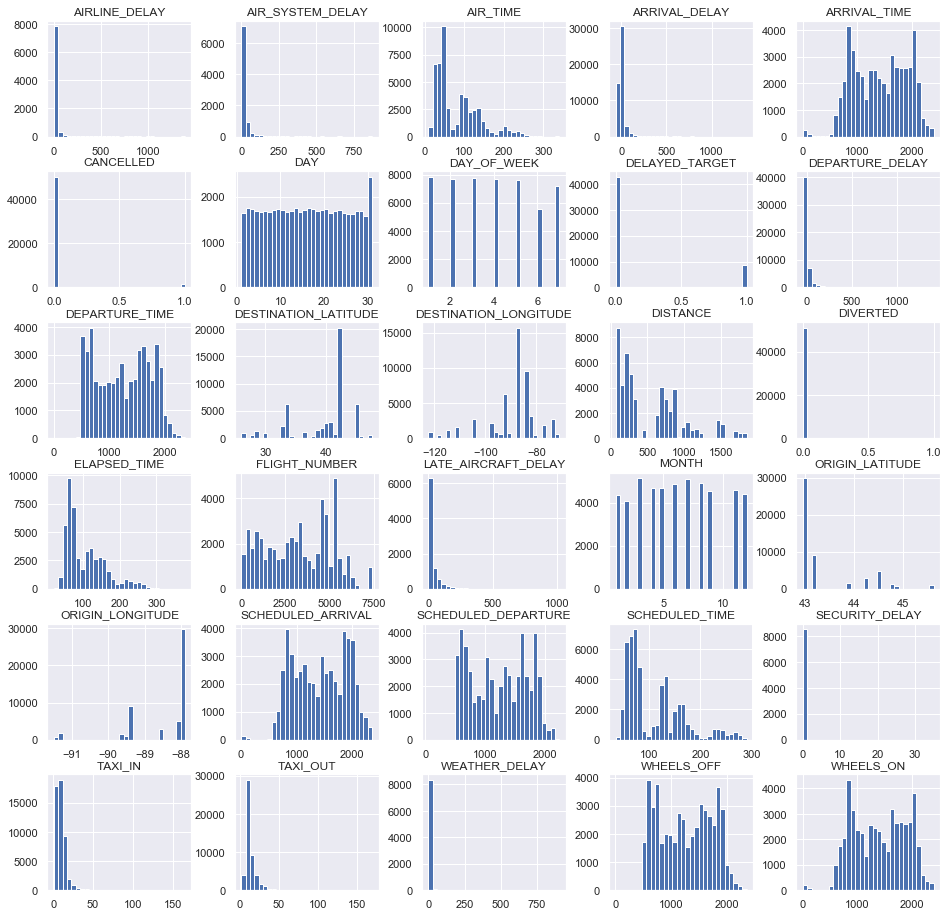

In [17]:
df.hist(bins=30, figsize=(16,16))
plt.show()

## 3.Data Cleaning

In [18]:
# replacing na's
columns_to_clean = (
    'CANCELLATION_REASON',
    'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY', 
    'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY',
    'WEATHER_DELAY',
    'DEPARTURE_TIME',
    'DEPARTURE_DELAY',
    'TAXI_OUT',
    'WHEELS_OFF',
    'ELAPSED_TIME',
    'AIR_TIME',
    'WHEELS_ON',
    'TAXI_IN',
    'ARRIVAL_TIME',
    'ARRIVAL_DELAY',    
    'TAIL_NUMBER'
        )

for c in columns_to_clean:
        df[c] = df[c].replace('nan', np.nan).fillna(0)

In [19]:
target = 'CANCELLED'
corr_matrix = df.corr()
corr_matrix[target].sort_values(ascending=False)

CANCELLED                1.000000
FLIGHT_NUMBER            0.051263
DESTINATION_LONGITUDE    0.042938
DESTINATION_LATITUDE     0.037698
SCHEDULED_DEPARTURE      0.032251
ORIGIN_LATITUDE          0.026886
SCHEDULED_ARRIVAL        0.024007
SECURITY_DELAY          -0.001427
DIVERTED                -0.007678
WEATHER_DELAY           -0.008412
ARRIVAL_DELAY           -0.011409
AIRLINE_DELAY           -0.016788
DEPARTURE_DELAY         -0.022925
DAY                     -0.029818
AIR_SYSTEM_DELAY        -0.030707
LATE_AIRCRAFT_DELAY     -0.033966
DAY_OF_WEEK             -0.034439
ORIGIN_LONGITUDE        -0.037626
MONTH                   -0.037906
SCHEDULED_TIME          -0.055383
DISTANCE                -0.062874
DELAYED_TARGET          -0.065627
TAXI_IN                 -0.206531
AIR_TIME                -0.225724
TAXI_OUT                -0.247918
ELAPSED_TIME            -0.288257
DEPARTURE_TIME          -0.367955
WHEELS_OFF              -0.384942
WHEELS_ON               -0.414219
ARRIVAL_TIME  

### 3.1 Replacing Values

You can achieve the same mapping with the help of dictionary comprehensions as shown below. This will be useful when the categories count is high and you don't want to type out each mapping. You will store the category names in a list called labels and then zip it to a seqeunce of numbers and iterate over it.

In [20]:
df.shape

(51376, 40)

In [21]:
# in progress.... This will go into the .py file shortly

def names_categorical(col):
    '''Converts names in columns to numerical values'''
    labels = df[col].astype('category').cat.categories.tolist()
    replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_comp, inplace=True)

    print(replace_map_comp)

In [22]:
names_categorical('AIRLINE')

{'AIRLINE': {'AA': 1, 'DL': 2, 'EV': 3, 'F9': 4, 'MQ': 5, 'OO': 6, 'UA': 7, 'US': 8, 'WN': 9}}


In [23]:
df.head(1) #shows that the categorical transform has worked

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,airline_full_name,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DELAYED_TARGET
0,7,1,3,6,3423,N170SY,MKE,SEA,1605,1603.0,...,Skywest Airlines Inc.,Milwaukee,WI,42.94722,-87.89658,Seattle,WA,47.44898,-122.30931,0


In [24]:
df.drop(columns=['TAIL_NUMBER','airline_full_name',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'DESTINATION_LATITUDE',
       'DESTINATION_LONGITUDE'], inplace=True)

In [25]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DELAYED_TARGET'],
      dtype='object')

#### 3.1 Limiting Sample Size: Adjust this to check models run

In [26]:
print('Length of dataframe is: ' + str(len(df)))

Length of dataframe is: 51376


In [27]:
df = df[:-1]
len(df)

51375

Categorical Features = cat_features & need to be separated from numerical features

In [28]:
y = df[target]
X = df.drop(columns=[target])

In [29]:
cat_list = ['MONTH','DAY_OF_WEEK','AIRLINE']

num_list = ['SCHEDULED_DEPARTURE',
            'LATE_AIRCRAFT_DELAY',
            'AIRLINE_DELAY',
            'WEATHER_DELAY',
            'AIR_SYSTEM_DELAY',
            'DISTANCE']

num_features = X[num_list]
X_num = num_features
cat_features = X[cat_list]

In [30]:
X_drop = pd.get_dummies(cat_features, columns=cat_list, drop_first=True)
X_drop.head()

,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_11,MONTH_12,...,DAY_OF_WEEK_6,DAY_OF_WEEK_7,AIRLINE_2,AIRLINE_3,AIRLINE_4,AIRLINE_5,AIRLINE_6,AIRLINE_7,AIRLINE_8,AIRLINE_9
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [31]:
y = df[target] #Target variable

In [32]:
X_drop.columns

Index(['MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7',
       'MONTH_8', 'MONTH_9', 'MONTH_11', 'MONTH_12', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'AIRLINE_2', 'AIRLINE_3', 'AIRLINE_4', 'AIRLINE_5',
       'AIRLINE_6', 'AIRLINE_7', 'AIRLINE_8', 'AIRLINE_9'],
      dtype='object')

### 3.3. Scaling

For the logistic regression model to be run in the next section, the data needed to be scaled. 

This increases the speed of optimisation, but it is also important for the l1 and l2 penalties that may be aplied, as these will be dependent upon the relative size of the features. The transformation was done using StandardScaler.One 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#### One Hot Encoding

In the cells below the categorical variables are made into binary variables using the pandas get_dummies() function. For this to work the categorical and numerical features must be identified and put into lists.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html


In [33]:
# categorical variables
X_drop.shape 

(51375, 24)

In [34]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_num))
print(X_scaled.shape)
X_scaled.head()

(51375, 6)


,0,1,2,3,4,5
0,0.795343,-0.214041,-0.105791,-0.053009,-0.193502,2.65595
1,0.795343,-0.214041,-0.105791,-0.053009,-0.193502,2.65595
2,0.795343,-0.214041,-0.105791,-0.053009,1.385786,2.65595
3,0.795343,-0.214041,-0.105791,-0.053009,-0.193502,2.65595
4,0.795343,-0.214041,-0.105791,-0.053009,-0.193502,2.65595


In [35]:
X_scaled.columns = num_list

In [36]:
X = pd.concat([X_scaled, X_drop], axis=1)

In [37]:
X.columns

Index(['SCHEDULED_DEPARTURE', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY',
       'WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'DISTANCE', 'MONTH_2', 'MONTH_3',
       'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9',
       'MONTH_11', 'MONTH_12', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3',
       'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7',
       'AIRLINE_2', 'AIRLINE_3', 'AIRLINE_4', 'AIRLINE_5', 'AIRLINE_6',
       'AIRLINE_7', 'AIRLINE_8', 'AIRLINE_9'],
      dtype='object')

## 4. Modelling
### 4.1. Train-Test split & KFold Validation

In order to be able to validate the model we had to split the dataset into train, validation and test segments: train_test_split:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [39]:
print('Training Set')
print('####################')
print(y_train.value_counts())
print('Test Set')
print('####################')
print(y_test.value_counts())

Training Set
####################
0    37576
1      955
Name: CANCELLED, dtype: int64
Test Set
####################
0    12537
1      307
Name: CANCELLED, dtype: int64


In [40]:
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X_scaled, 
                                                                    y, 
                                                                    test_size=0.25, 
                                                                    random_state=50)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train_initial, 
                                                  y_train_initial, 
                                                  test_size=0.25,
                                                  random_state=50)

In [42]:
print("len x_train_initial is: " + str(len(X_train_initial)))
print("len X_scaled is: " + str(len(X_scaled)))
X_scaled.shape

len x_train_initial is: 38531
len X_scaled is: 51375


(51375, 6)

### Class Imbalance

In [43]:
# Use the SMOTE class from the imblearn package in order to improve the model's performance on the minority class.
from imblearn.over_sampling import SMOTE, ADASYN

print(y_train_initial.value_counts())
print(y_test.value_counts())

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_scaled, y) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

0    37597
1      934
Name: CANCELLED, dtype: int64
0    12516
1      328
Name: CANCELLED, dtype: int64


1    50113
0    50113
Name: CANCELLED, dtype: int64


In [44]:
%%time
from sklearn.metrics import roc_auc_score, roc_curve, auc

Wall time: 0 ns


In [45]:
%%time
skf = StratifiedKFold(n_splits=3,random_state=50)

Wall time: 0 ns


In [46]:
class Classification():
    
    def __init__(self, model, X_train, X_val, y_train, y_val):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.scores_table = pd.DataFrame()
        
        if self.model == 'Logistic Regression':
            self.instantiate = LogisticRegression(fit_intercept=False, class_weight='balanced') # balanced?
        elif self.model == 'Decision Tree':
            self.instantiate = DecisionTreeClassifier(random_state=50)
        elif self.model == 'Random Forest':
            self.instantiate = RandomForestClassifier(n_estimators=20, 
                                                          n_jobs=-1,
                                                          random_state=42)
        elif self.model == "SVM":
            self.instantiate = SVC(probability=True,
                                   random_state=50)
        
# SCORE FUNCTION -------------------------------------------------------------
        
    def scores(self, model, X_train, X_val, y_train, y_val):
        
        train_prob = model.predict_proba(X_train)[:,1]
        val_prob = model.predict_proba(X_val)[:,1]
        
        train_auc = roc_auc_score(y_train, train_prob)
        val_auc = roc_auc_score(y_val, val_prob)
        
        self.train_auc = train_auc
        self.val_auc = val_auc
        
        self.scores_table = pd.DataFrame()
        
        self.scores_table["Model"] = [self.model]
        self.scores_table["Train AUC"] = [self.train_auc]
        self.scores_table["Validation AUC"] = [self.val_auc]
        
        return self.scores_table
    
# THRESHOLD ANNOTATION -------------------------------------------------------

    def annot(fpr,tpr,thr):
        k=0
        for i,j in zip(fpr,tpr):
            if k % 100 == 0:
                plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
            k+=1
            
# ROC PLOT FUNCTION ----------------------------------------------------------

    def roc_plot(model, X_train, X_val, y_train, y_val):
        train_prob = model.predict_proba(X_train)[:,1]
        val_prob = model.predict_proba(X_val)[:,1]
        plt.figure(figsize=(7,7))
        for data in [[y_train, train_prob],[y_val, val_prob]]:
            fpr, tpr, thresh = roc_curve(data[0], data[1])
            plt.plot(fpr, tpr)
        Classification.annot(fpr, tpr, thresh)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='-')
        plt.ylabel('TPR (power)')
        plt.xlabel('FPR (alpha)')
        plt.legend(['train','val'])
        plt.show()
        
# GET SCORES FUNCTION --------------------------------------------------------

    def get_scores(self, param_grid, cv_type):
        reg = self.instantiate
        fit_reg = reg.fit(self.X_train, self.y_train)
        opt_model = GridSearchCV(fit_reg,
                                 param_grid,
                                 cv=cv_type,
                                 scoring='roc_auc',
                                 return_train_score=True,
                                 n_jobs=-1)
        
        self.opt_model = opt_model.fit(self.X_train, self.y_train) 
        self.best_model = opt_model.best_estimator_
        self.scores = Classification.scores(self,
                                            self.best_model,
                                            self.X_train,
                                            self.X_val,
                                            self.y_train,
                                            self.y_val)
        
        self.best_params = opt_model.best_params_
        display(self.scores_table)
        print("The best hyperparameters are: ", self.best_params,'\n')
        self.roc_plot = Classification.roc_plot(self.best_model,
                                                self.X_train,
                                                self.X_val,
                                                self.y_train,
                                                self.y_val)
        self.y_predicted = opt_model.predict(self.X_val)
        
# OPTIMUM PLOT FUCNTION ------------------------------------------------------

    def opt_plots(self):
        
        if self.model == "Decision Tree" or self.model == "Random Forest":
            opt = pd.DataFrame(self.opt_model.cv_results_)
            cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
            params = pd.DataFrame(list(opt.params))
            opt = pd.concat([params, opt[cols]], axis=1, sort=False)
            
            plt.figure(figsize=[15,4])
            plt.subplot(121)
            sns.heatmap(pd.pivot_table(opt,
                                       index='max_depth',
                                       columns='min_samples_leaf',
                                       values='mean_train_score')*100) #can add cmap="Blues"
            plt.title('ROC_AUC - Training')
            plt.subplot(122)
            sns.heatmap(pd.pivot_table(opt,
                                       index='max_depth',
                                       columns='min_samples_leaf',
                                       values='mean_test_score')*100)
            plt.title('ROC_AUC - Validation')
            
        else:
            print("This model does not have an optimum hyperparameter plot!")
        
# CONFUSION MATRIX FUNCTION --------------------------------------------------

    def conf_matrix(y_true, y_pred):
        
        cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
        
        for i, label in enumerate(y_true):
            
            pred = y_pred[i]
            if label == 1:
                if label == pred:
                    cm['TP'] += 1
                else:
                    cm['FN'] += 1
            else:
                if label == pred:
                    cm['TN'] += 1
                else:
                    cm['FP'] += 1
                
        return cm
        
# DISPLAY PRETTY CONFUSION MATRIX FUNCTION -----------------------------------

    def pretty_conf_matrix(self):
        
        Classification.conf_matrix(self.y_val, self.y_predicted)
        cnf_matrix = confusion_matrix(self.y_val, self.y_predicted)
        
        plt.figure(figsize=(6,6))
        plt.imshow(cnf_matrix, cmap=plt.cm.Blues)
        
        plt.title('Confusion Matrix')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
        class_names = set(y)
        tick_marks = np.arange(1,2,1)
        plt.xticks(tick_marks, [1,0], rotation=45)
        plt.yticks(tick_marks, [1,0])

        thresh = cnf_matrix.max() / 2.
        for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
                plt.text(j, i, cnf_matrix[i, j],
                         horizontalalignment='center')
        plt.colorbar

# PLOT DECISION TREE FUCNTION ------------------------------------------------

    def plot_dtree(self):
        
        if self.model == "Decision Tree" or self.model == "Random Forest":
            
            dot_data = StringIO()
            export_graphviz(self.best_model, 
                            out_file=dot_data, 
                            filled=True,
                            rounded=True,
                            special_characters=True)
            graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
            graph.write_png(f'{self.model}.png')
            image = mpimg.imread(f'{self.model}.png')
            plt.figure(figsize=(50,50))
            plt.imshow(image)
            plt.show()
            
        else:
            
            print("This model does not have a decision tree plot!")

# GET OPTIMUM THRESHOLD ------------------------------------------------------

  #  def get_threshold(self, prev, ctp, ctn, cfp, cfn):     

## 4.1 Logistic Regression

In [47]:
logistic_regression = Classification('Logistic Regression', X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Logistic Regression,0.706429,0.714846


The best hyperparameters are:  {'C': 100, 'solver': 'sag'} 



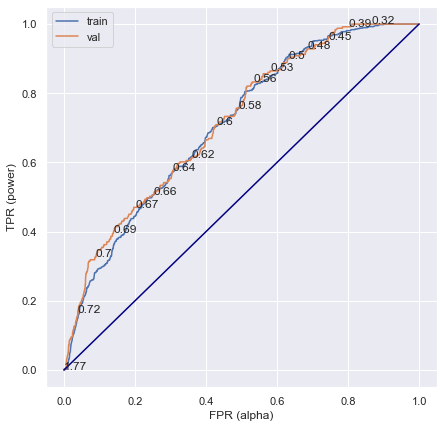

Wall time: 17 s


In [48]:
%%time
import time
time.sleep(3)

param_grid = {'C':[0.1,1,10,100],
              'solver':['lbfgs','liblinear','sag','saga']}
logistic_regression.get_scores(param_grid, skf)

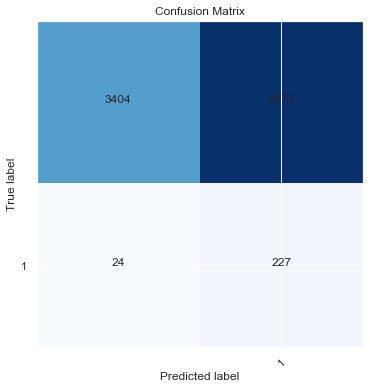

In [49]:
logistic_regression.pretty_conf_matrix()

## 4.4. Decision Tree
### 4.4.1. Decision Tree Iteration 1

,Model,Train AUC,Validation AUC
0,Decision Tree,0.831361,0.754325


The best hyperparameters are:  {'max_depth': 15, 'min_samples_leaf': 150} 



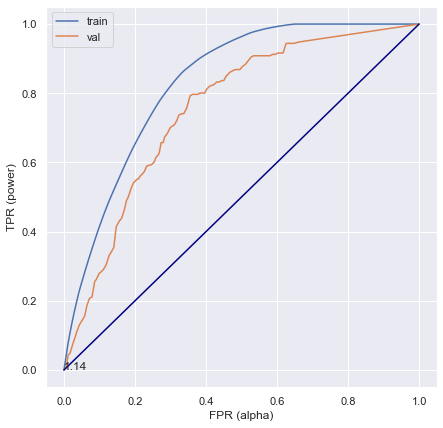

In [50]:
param_grid = {'max_depth':[15,20,25,50,100,200], 'min_samples_leaf':[10,100,150,200]}
decision_tree = Classification("Decision Tree", X_train, X_val, y_train, y_val)
decision_tree.get_scores(param_grid, skf)

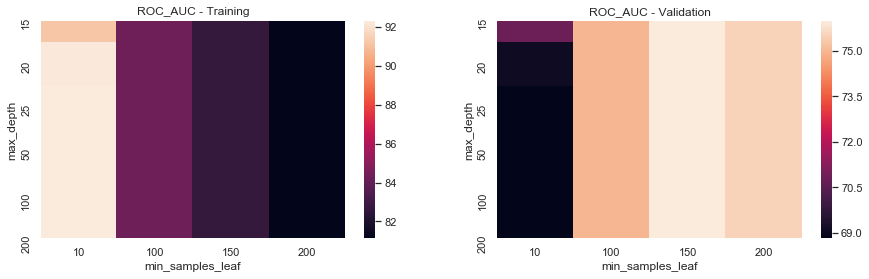

In [51]:
decision_tree.opt_plots()

## 2nd Iteration

,Model,Train AUC,Validation AUC
0,Decision Tree,0.827485,0.753405


The best hyperparameters are:  {'max_depth': 10, 'min_samples_leaf': 140} 



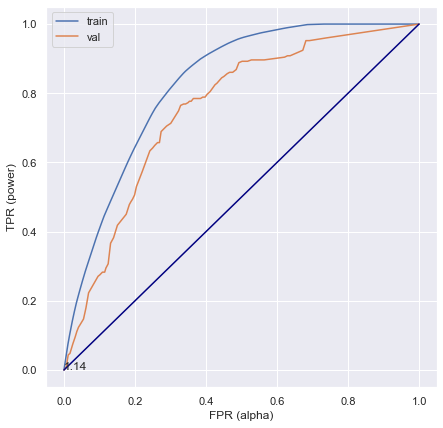

In [52]:
param_grid = {'max_depth':range(0,100,10), 'min_samples_leaf':range(20,200,20)}
decision_tree_2 = Classification("Decision Tree", X_train, X_val, y_train, y_val)
decision_tree_2.get_scores(param_grid, skf)

Very little difference with the numbers, so will stop here...

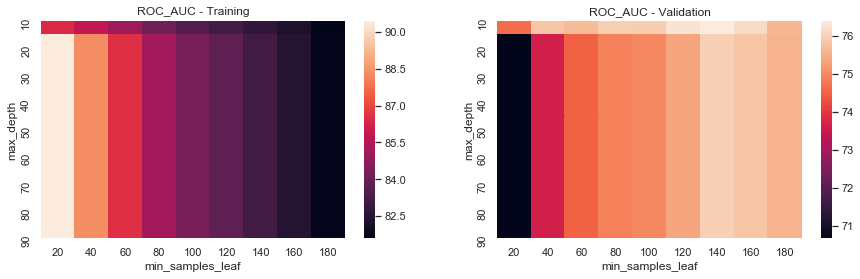

In [53]:
decision_tree_2.opt_plots()

## 4.5. Random Forest
### 4.5.1. Random Forest Iteration 1

,Model,Train AUC,Validation AUC
0,Random Forest,0.845074,0.806482


The best hyperparameters are:  {'max_depth': 10, 'min_samples_leaf': 10} 



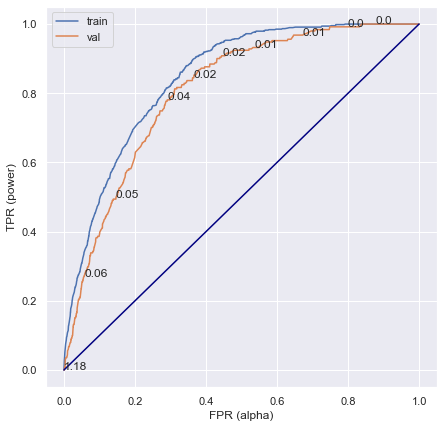

In [54]:
param_grid = {'max_depth':[1,10,100,1000], 'min_samples_leaf':[1,10,100,1000]}
random_forest = Classification("Random Forest", X_train, X_val, y_train, y_val)
random_forest.get_scores(param_grid, skf)

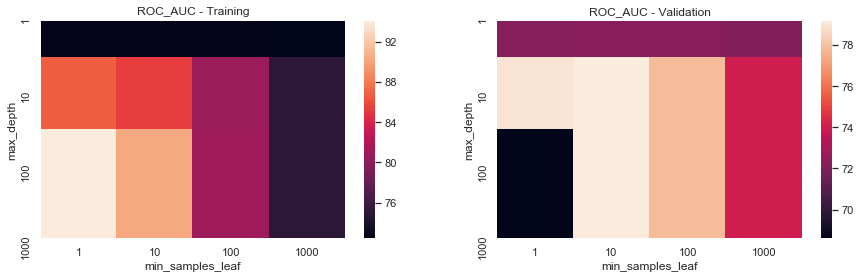

In [55]:
random_forest.best_model
random_forest.opt_plots()

### 4.5.2. Random Forest Iteration 2

Max depth 100 & number of leaves = 10 were selected, so are sweeping around them

,Model,Train AUC,Validation AUC
0,Random Forest,0.875941,0.80676


The best hyperparameters are:  {'max_depth': 50, 'min_samples_leaf': 19} 



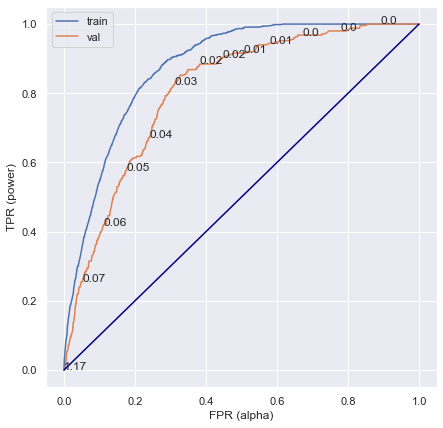

In [56]:
param_grid = {'max_depth':[50,100,150,200], 'min_samples_leaf':range(1,21,2)}
random_forest2 = Classification("Random Forest", X_train, X_val, y_train, y_val)
random_forest2.get_scores(param_grid, skf)

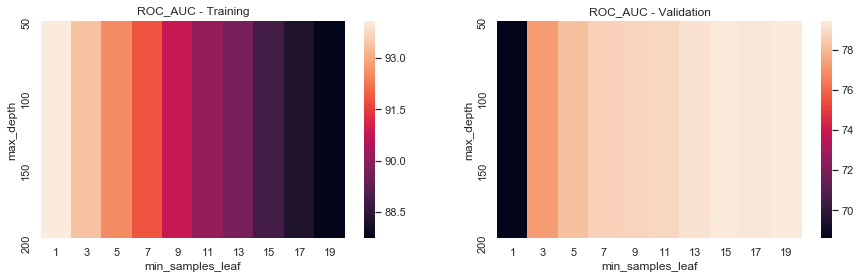

In [57]:
random_forest2.opt_plots()

## Ensemble Class

### 4.6. Ensemble Class

In [58]:
class Ensemble(Classification):
    
    def __init__(self, ensemble_method, estimators, X_train, X_val, y_train, y_val):
        
        self.ensemble_method = ensemble_method
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        
        if self.ensemble_method == "Voting":
            self.instantiate = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
        elif self.ensemble_method == "AdaBoost":
            self.instantiate = AdaBoostClassifier(estimators, algorithm='SAMME', n_estimators=20)
        elif self.ensemble_method == "XGBoost":
            self.instantiate = XGBClassifier(n_jobs=-1)
        elif self.ensemble_method == "Stacking":
            self.instantiate = StackingClassifier(estimators)
            
    def ensemble_scores(self):

        train_prob = self.instantiate.predict_proba(self.X_train)[:,1]
        val_prob = self.instantiate.predict_proba(self.X_val)[:,1]

        train_auc = roc_auc_score(self.y_train, train_prob)
        val_auc = roc_auc_score(self.y_val, val_prob)

        self.train_auc = train_auc
        self.val_auc = val_auc

        self.scores_table = pd.DataFrame()

        self.scores_table["Model"] = [self.ensemble_method]
        self.scores_table["Train AUC"] = [self.train_auc]
        self.scores_table["Validation AUC"] = [self.val_auc]

        return self.scores_table
    
    def ensemble_get_scores(self, param_grid, cv_type):
        reg = self.instantiate
        fit_reg = reg.fit(self.X_train, self.y_train)
        opt_model = GridSearchCV(fit_reg,
                                 param_grid,
                                 cv=cv_type,
                                 scoring='roc_auc',
                                 return_train_score=True,
                                 n_jobs=-1)
        self.opt_model = opt_model.fit(self.X_train, self.y_train) 
        self.best_model = opt_model.best_estimator_
        self.scores = Ensemble.ensemble_scores(self)
        self.best_params = opt_model.best_params_
        display(self.scores_table)
        self.roc_plot = Classification.roc_plot(self.best_model,
                                                self.X_train,
                                                self.X_val,
                                                self.y_train,
                                                self.y_val)
        self.y_predicted = opt_model.predict(self.X_val)
        
    def conf_matrix(y_true, y_pred):
        
        cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
        
        for i, label in enumerate(y_true):
            
            pred = y_pred[i]
            if label == 1:
                if label == pred:
                    cm['TP'] += 1
                else:
                    cm['FN'] += 1
            else:
                if label == pred:
                    cm['TN'] += 1
                else:
                    cm['FP'] += 1
                
        return cm
    
    def ensemble_pretty_conf_matrix(self):
        
        Ensemble.conf_matrix(self.y_val, self.y_predicted)
        cnf_matrix = confusion_matrix(self.y_val, self.y_predicted)
        
        plt.figure(figsize=(6,6))
        plt.imshow(cnf_matrix, cmap=plt.cm.Greens)
        
        plt.title('Confusion Matrix')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
        class_names = set(y)
        tick_marks = np.arange(1,2,1)
        plt.xticks(tick_marks, [1,0], rotation=45)
        plt.yticks(tick_marks, [1,0])

        thresh = cnf_matrix.max() / 2.
        for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
                plt.text(j, i, cnf_matrix[i, j],
                         horizontalalignment='center')
        plt.colorbar

## 4.7. Voting Classifier¶

In [59]:
log_reg = ('lr', logistic_regression.best_model)
dtree = ('dt', decision_tree.best_model)
rand_forest = ('rnd', random_forest.best_model)
estimators = [log_reg, dtree, rand_forest]

In [60]:
voting = Ensemble("Voting", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Voting,0.778306,0.760734


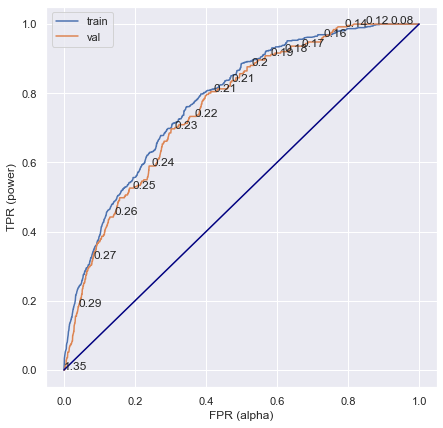

In [61]:
voting.ensemble_get_scores({}, skf)

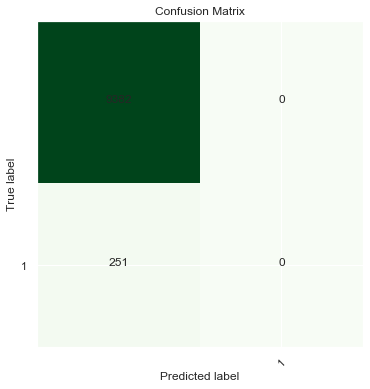

In [62]:
voting.ensemble_pretty_conf_matrix()

## 4.8. AdaBoost
### 4.8.1. AdaBoost - Logistic Regression

In [63]:
estimators = logistic_regression.best_model
adaboost1 = Ensemble("AdaBoost", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,AdaBoost,0.625146,0.600019


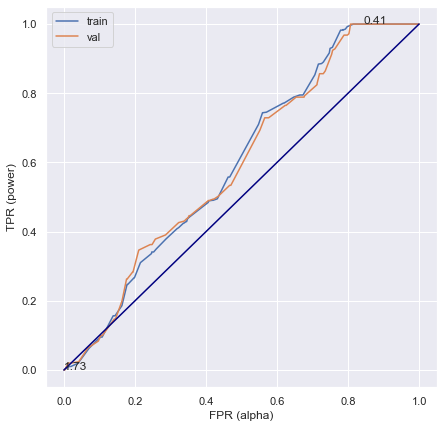

In [64]:
adaboost1.ensemble_get_scores({}, skf)

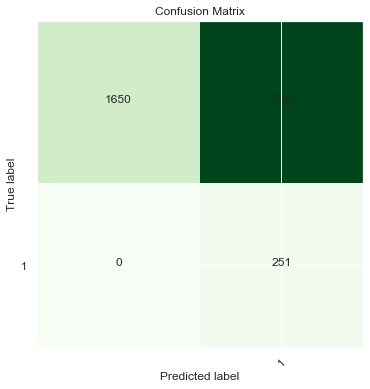

In [65]:
adaboost1.ensemble_pretty_conf_matrix()

In [66]:
estimators = decision_tree.best_model
adaboost2 = Ensemble("AdaBoost", estimators, X_train, X_val, y_train, y_val)

In [ ]:
adaboost1.ensemble_get_scores({}, skf)

### 4.8.3. AdaBoost - Random Forest

In [ ]:
estimators = random_forest.best_model
adaboost3 = Ensemble("AdaBoost", estimators, X_train, X_val, y_train, y_val)

In [ ]:
adaboost3.ensemble_get_scores({}, skf)

### 4.8.4. AdaBoost - Voting Classifier

In [ ]:
estimators = voting.best_model
adaboost4 = Ensemble("AdaBoost", estimators, X_train, X_val, y_train, y_val)

In [ ]:
adaboost4.ensemble_get_scores({}, skf)

In [ ]:
adaboost4.ensemble_pretty_conf_matrix()

### 4.9. XGBoost

In [ ]:
# installed but not working = need to look into this!!!!!
from xgboost.sklearn import XGBClassifier

In [ ]:
## XGBoost is not working on my machine!!!

estimators = []
xgboost = Ensemble("XGBoost", estimators, X_train, X_val, y_train, y_val)
xgboost.ensemble_get_scores({}, skf)

In [ ]:
xgboost.ensemble_pretty_conf_matrix()

In [ ]:
### 4.10. Stacking

In [ ]:
estimators = [('lr',logistic_regression.best_model), 
              ('dt', decision_tree.best_model), 
              ('rnd', random_forest.best_model)]
stacking = Ensemble("Stacking", estimators, X_train, X_val, y_train, y_val)

In [ ]:
stacking.ensemble_get_scores({}, skf)

In [ ]:
stacking.ensemble_pretty_conf_matrix()

## 5. Model Evaluation
### 5.1 Feature Importance

In [ ]:
final_model = random_forest.best_model

In [ ]:
feature_importance = pd.DataFrame(final_model.feature_importances_)

In [ ]:
feature_importance.rename(columns={0:'Importance'}, inplace=True)

In [ ]:
feature_importance['Feature'] = X_s.columns

In [ ]:
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

In [ ]:
feature_importance.head(20)

In [ ]:
top_20_features = feature_importance.head(20)

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x='Feature', y='Importance', data=top_20_features, palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel('Importance', fontsize=14)
plt.show()

### Straight from the Lab if needed

In [ ]:
### Straight from the labs

%time
import time
time.sleep(3)

# Now let's compare a few different ratios of minority class to majority class
ratios = [0.25, 0.33, 0.5, 0.7, 1]
names = ['0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    # Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()